In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()

In [5]:
X = boston['data']

In [6]:
X.shape

(506, 13)

#### Step 1

In [9]:
mu = X.mean(axis=0)
# mean centering
X_ = (X - mu)
X_.shape

(506, 13)

#### Step 2

In [12]:
S = np.dot(X_.T, X_)
S.shape

(13, 13)

#### Step 3

In [13]:
lambdas, vectors = np.linalg.eig(S)

In [14]:
lambdas.shape

(13,)

In [15]:
lambdas[:2]

array([15599405.18671572,  3156416.68100505])

In [16]:
vectors.shape

(13, 13)

#### Step 4

In [22]:
V = vectors[:, :2]
V.shape

(13, 2)

#### Step 5 Projection

In [24]:
X_.shape

(506, 13)

In [25]:
V.shape

(13, 2)

In [26]:
X_new = np.dot(X_, V)
X_new.shape

(506, 2)

In [31]:
X_new

array([[-119.81884272,   -5.56005586],
       [-168.89015548,   10.11620863],
       [-169.31170747,   14.0805323 ],
       ...,
       [-138.38716306,    0.9380922 ],
       [-137.50517338,    4.2518251 ],
       [-139.19033295,    1.00906423]])

In [36]:
total = sum(lambdas)

In [41]:
explained_variance = np.round(lambdas/total, 3)
explained_variance

array([0.806, 0.163, 0.021, 0.007, 0.001, 0.001, 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   ])

In [43]:
explained_variance[:2].sum()

0.9690000000000001

In [44]:
explained_variance

array([0.806, 0.163, 0.021, 0.007, 0.001, 0.001, 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   ])

In [46]:
cummulative_variance =  np.cumsum(explained_variance)
cummulative_variance

array([0.806, 0.969, 0.99 , 0.997, 0.998, 0.999, 0.999, 0.999, 0.999,
       0.999, 0.999, 0.999, 0.999])

In [49]:
import matplotlib.pyplot as plt

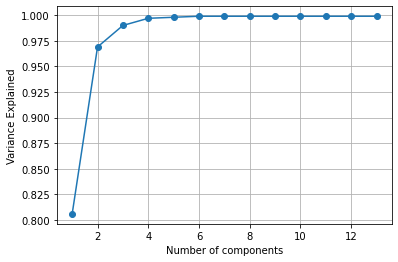

In [53]:
plt.plot( range(1, len(cummulative_variance)+1) , cummulative_variance, marker="o")
plt.xlabel("Number of components")
plt.ylabel("Variance Explained")
plt.grid("on")

## Sklearn

In [28]:
from sklearn.decomposition import PCA

In [29]:
pca = PCA(n_components=2)

In [30]:
pca.fit_transform(X)

array([[-119.81884272,   -5.56005586],
       [-168.89015548,   10.11620863],
       [-169.31170747,   14.0805323 ],
       ...,
       [-138.38716306,    0.9380922 ],
       [-137.50517338,    4.2518251 ],
       [-139.19033295,    1.00906423]])

In [33]:
pca.explained_variance_ratio_

array([0.80582318, 0.16305197])

In [34]:
pca.explained_variance_ratio_.sum()

0.9688751429772717